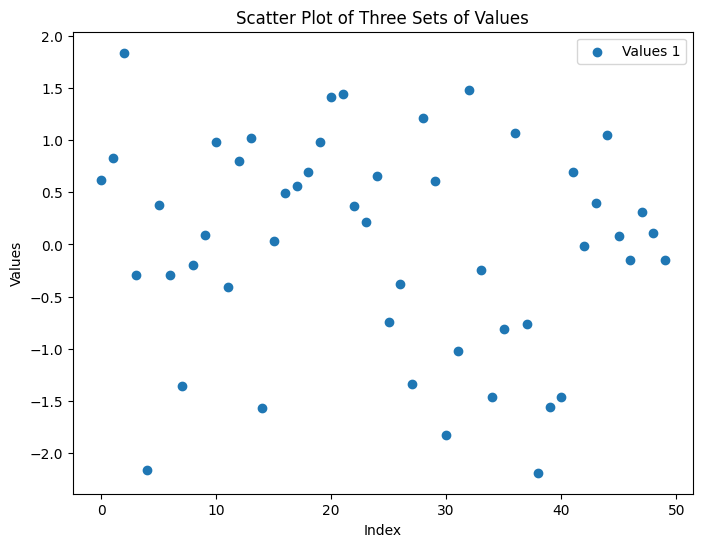

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
values_1 = np.random.randn(50)
values_2 = np.random.randn(20)
values_3 = np.random.randn(20)
# Z-score normalization
mean_value = np.mean(values_1)
std_dev = np.std(values_1)

normalized_values_1 = (values_1 - mean_value) / std_dev
# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for values_1
plt.scatter(range(len(normalized_values_1)), normalized_values_1, label='Values 1', marker='o')

# Scatter plot for values_2
#plt.scatter(range(len(values_2)), values_2, label='Values 2', marker='s')

# Scatter plot for values_3
#plt.scatter(range(len(values_3)), values_3, label='Values 3', marker='^')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Three Sets of Values')
plt.legend()

# Show the plot
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd



,2.094261,1.458506,1.819474
1,2.219355,2.459685,3.124442
2,1.231838,2.157710,1.798204
3,2.220191,2.471795,2.657148
4,2.188401,1.791296,2.411559
5,1.775276,2.477284,1.930961
...,...,...,...
795,4.189150,1.406901,1.077606
796,4.485795,1.814050,0.973316
797,5.949203,2.062675,0.910193
798,5.221915,2.351092,1.401764


In [1]:
import pandas as pd

# Assuming 'data_clustering.csv' is your data file
df = pd.read_csv('data_clustering.csv', header=None)
df.columns=['A','B','C']
df.head()


,A,B,C
0,2.094261,1.458506,1.819474
1,2.219355,2.459685,3.124442
2,1.231838,2.157710,1.798204
3,2.220191,2.471795,2.657148
4,2.188401,1.791296,2.411559


In [104]:
arr=df.head(3)
arr=np.array(arr)
print(len(arr))
num_cols=arr.shape[1]
print(num_cols)
mean=sum(arr)/len(arr)
mean=np.ones((len(arr),num_cols))*mean
print(mean)

sigma = np.sqrt(sum((arr-mean)**2)/(len(arr)))
print(sigma)
res=(arr - mean) /sigma
res

3
3
[[1.84848434 2.02530024 2.24737318]
 [1.84848434 2.02530024 2.24737318]
 [1.84848434 2.02530024 2.24737318]]
[0.43901539 0.41931629 0.62024187]


array([[ 0.559835  , -1.3517109 , -0.68989149],
       [ 0.84477738,  1.03593631,  1.41407497],
       [-1.40461238,  0.3157746 , -0.72418348]])

In [106]:
import numpy as np

class Zscorer():
    def __init__(self):
     #   self.mean = float
        self.mean_arr = float

        self.sigma = float

    def fit(self, X):
        """
        Estimate the mean and standard deviation for data X.

        Parameters:
        - X: numpy array, shape [N, n], where N is the number of samples and n is the feature space dimension.
        """
        self.X = X
        num_cols=X.shape[1]
        mean=sum(self.X)/len(self.X)
       # self.mean_arr=np.ones((len(self.X),num_cols))*mean

      #  self.sigma = np.sqrt(sum((self.X-self.mean_arr)**2)/(len(self.X)-1))
        self.mean_arr = np.ones((len(self.X),num_cols))*mean
        self.sigma = np.sqrt(sum((self.X-self.mean_arr)**2)/(len(self.X)))
        print(self.sigma)

    def transform(self):
        """
        Z-score the data X.

        Parameters:
        - X: numpy array, shape [N, n], where N is the number of samples and n is the feature space dimension.

        Returns:
        - X_transformed: Z-scored data.
        """
        # if self.mean_arr is None or self.sigma is None:
        #     raise ValueError("fit method must be called before transform")
        self.X=(self.X - self.mean_arr) / self.sigma

        return (self.X)
    def inverse_transform(self):
        """
        Reverse the z-scoring on the data.

        Parameters:
        - X_transformed: Z-scored data.

        Returns:
        - X_original: Original data before z-scoring.
        """
        if self.mean_arr is None or self.sigma is None:
            raise ValueError("fit method must be called before inverse_transform")
        self.X=self.X * self.sigma + self.mean_arr
        return  self.X

# Example usage:
# Assuming X is your data
arr=df.head(3)
arr=np.array(arr)
# (a) Fit the Zscorer
zscorer = Zscorer()
zscorer.fit(arr)

# (b) Z-score the data
X_transformed = zscorer.transform()

# (c) Inverse transform
X_original = zscorer.inverse_transform()

# (e) Validate against scikit-learn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed_sklearn = scaler.fit_transform(arr)

# Compare the results
np.testing.assert_allclose(X_transformed, X_transformed_sklearn,rtol=1e-05)


[0.43901539 0.41931629 0.62024187]


In [108]:
import numpy as np

class Zscorer:
    def __init__(self):
        self.mean_ = None
        self.sigma_ = None

    def fit(self, X):
        """
        Estimate the mean and standard deviation for data X.

        Parameters:
        - X: numpy array, shape [N, n], where N is the number of samples and n is the feature space dimension.
        """
        self.mean_ = np.mean(X, axis=0)
        self.sigma_ = np.std(X, axis=0, ddof=0)

    def transform(self, X):
        """
        Z-score the data X.

        Parameters:
        - X: numpy array, shape [N, n], where N is the number of samples and n is the feature space dimension.

        Returns:
        - X_transformed: Z-scored data.
        """
        if self.mean_ is None or self.sigma_ is None:
            raise ValueError("fit method must be called before transform")
        return (X - self.mean_) / self.sigma_

    def inverse_transform(self, X_transformed):
        """
        Reverse the z-scoring on the data.

        Parameters:
        - X_transformed: Z-scored data.

        Returns:
        - X_original: Original data before z-scoring.
        """
        if self.mean_ is None or self.sigma_ is None:
            raise ValueError("fit method must be called before inverse_transform")
        return X_transformed * self.sigma_ + self.mean_

# Example usage:
# Assuming X is your data
arr = df.head(3)
arr = np.array(arr)
# (a) Fit the Zscorer
zscorer = Zscorer()
zscorer.fit(arr)

# (b) Z-score the data
X_transformed = zscorer.transform(arr)

# (c) Inverse transform
X_original = zscorer.inverse_transform(X_transformed)

# (e) Validate against scikit-learn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed_sklearn = scaler.fit_transform(arr)

# Compare the results
#np.testing.assert_allclose(X_transformed, X_transformed_sklearn, rtol=1e-07)
np.testing.assert_allclose(X_transformed, X_transformed_sklearn, rtol=1e-05, atol=1e-08)


In [86]:
import scipy.stats as stats
arr=df.head(3)
arr=np.array(arr)
zscores = stats.zscore(arr)
zscores

array([[ 0.559835  , -1.3517109 , -0.68989149],
       [ 0.84477738,  1.03593631,  1.41407497],
       [-1.40461238,  0.3157746 , -0.72418348]])

Number of clusters: 3


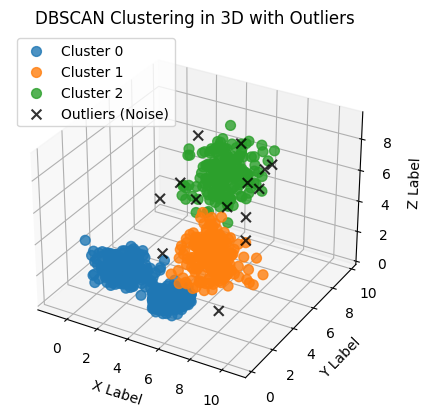

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Assuming X is your 3D data
X=np.array(df)
# Use DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(X)

# Count the number of clusters (ignoring noise, labeled as -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {num_clusters}")

# Plotting function for 3D clusters with outliers
def plot_3d_clusters(X, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get unique labels excluding noise (-1)
    unique_labels = np.unique(labels[labels != -1])

    # Scatter plot for each cluster
    for cluster_label in unique_labels:
        cluster_indices = (labels == cluster_label)
        ax.scatter(
            X[cluster_indices, 0],
            X[cluster_indices, 1],
            X[cluster_indices, 2],
            label=f'Cluster {cluster_label}',
            s=50,
            alpha=0.8
        )

    # Plot outliers (noise points)
    outlier_indices = (labels == -1)
    ax.scatter(
        X[outlier_indices, 0],
        X[outlier_indices, 1],
        X[outlier_indices, 2],
        label='Outliers (Noise)',
        c='black',
        marker='x',
        s=50,
        alpha=0.8
    )

    # Set labels
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # Add legend
    ax.legend()

    plt.title('DBSCAN Clustering in 3D with Outliers')
    plt.show()

# Plot 3D clusters with outliers
plot_3d_clusters(X, labels)


In [19]:
import numpy as np

# Assuming 'labels' is the array of cluster labels
label_0_count = np.count_nonzero(labels == 0)
label_1_count = np.count_nonzero(labels == 1)
label_2_count = np.count_nonzero(labels == 2)
label__1_count = np.count_nonzero(labels == -1)

print(f"Label 0 count: {label_0_count}")
print(f"Label 1 count: {label_1_count}")
print(f"Label 2 count: {label_2_count}")
print(f"Label -1 count: {label__1_count}")


Label 0 count: 400
Label 1 count: 195
Label 2 count: 191
Label -1 count: 14


Number of clusters: 3


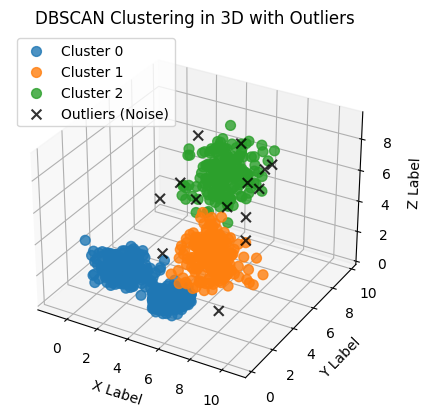